In [8]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data
nodes = G.nodes(data=True)

#print(txt)
# print degree for each team - number of games
'''print('*****Results******')
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()'''

'print(\'*****Results******\')\nfor n, d in G.degree():\n    print(f"{n:20} {d:2}")\n\noptions = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}\n\npos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout\nnx.draw(G, pos, **options)\nplt.show()'

In [25]:
nodes = G.nodes(data=True)
#for node in nodes:
#    print(node)
def extract_conference(nodes,team):
    for node in nodes:
        if node[0]==team:
            return node[1]['value']
node_color = [node[1]['value'] for node in nodes]
edges = G.edges()
node_values = list(range(0,len(nodes)))
node_keys = [node[0]for node in nodes]
node_labels = dict(zip(node_keys,node_values))

#print(edges)
# get all games of one team
#for edge in edges:
#    conference_1 = extract_conference(nodes,edge[0])
#    conference_2 = extract_conference(nodes,edge[1])
#    print(conference_1,conference_2)


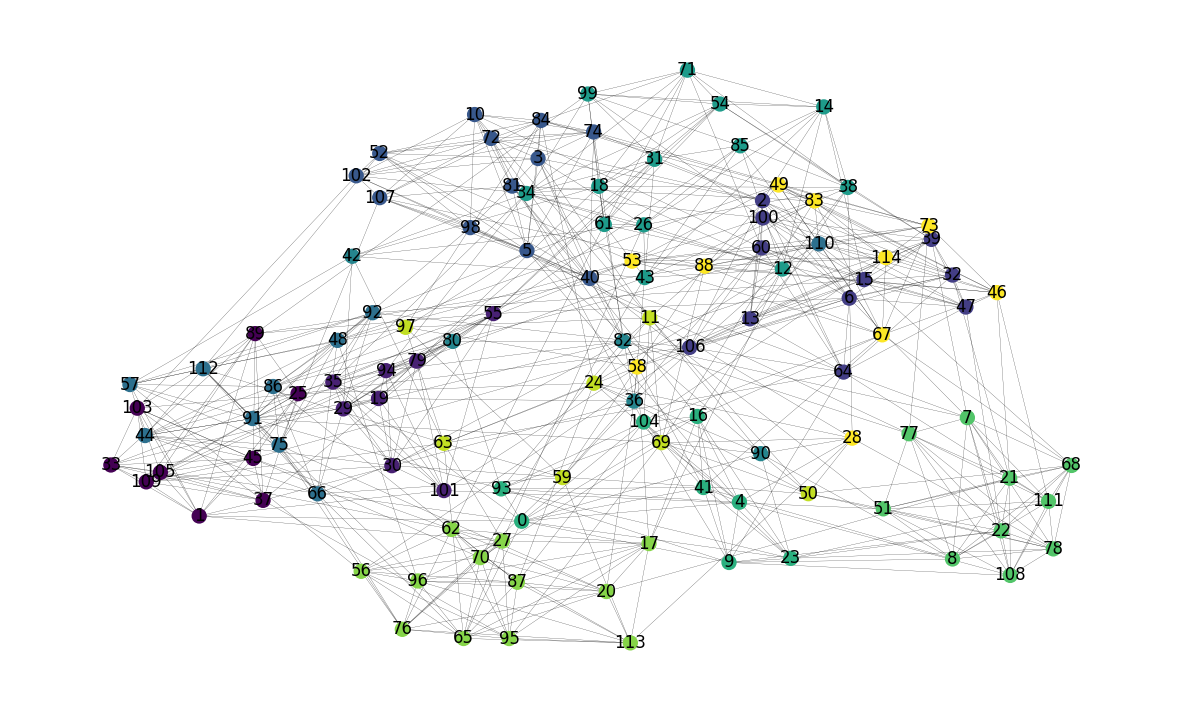

In [48]:
fig, ax = plt.subplots(figsize=(15, 9))
plot_options = {"node_size": 100, "with_labels": True, "width": 0.15}
pos = nx.spring_layout(G, iterations=20, seed=1721, k=0.15)
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color = node_color, labels = node_labels ,**plot_options)

In [ ]:
print(pos)

In [10]:
neighbors = G.neighbors(1)

NetworkXError: The node 1 is not in the graph.

In [31]:
def extract_index(nodes,team):
    index = range(0,len(nodes))
    for ind, node in zip(index,nodes):
        if node[0]==team:
            return ind
neighs = list(G.neighbors('FloridaState'))

In [32]:
neighbor_indices = [extract_index(nodes,item) for item in neighs]



In [33]:
for item in neighs:
    print(pos[item])

[-0.1474912  -0.52576539]
[-0.60589022 -0.09435199]
[-0.18716847 -0.59293482]
[-0.98935236 -0.33550682]
[-0.67747781 -0.45510043]
[-0.69762397 -0.31335453]
[-0.95027501 -0.06334263]
[-0.6937298  0.1088047]
[-0.3068687 -0.4220397]
[-0.93524993 -0.14332641]
[-0.88792289 -0.36063633]
[-0.91683026 -0.39260846]


In [34]:
nodes

NodeDataView({'BrighamYoung': {'value': 7}, 'FloridaState': {'value': 0}, 'Iowa': {'value': 2}, 'KansasState': {'value': 3}, 'NewMexico': {'value': 7}, 'TexasTech': {'value': 3}, 'PennState': {'value': 2}, 'SouthernCalifornia': {'value': 8}, 'ArizonaState': {'value': 8}, 'SanDiegoState': {'value': 7}, 'Baylor': {'value': 3}, 'NorthTexas': {'value': 10}, 'NorthernIllinois': {'value': 6}, 'Northwestern': {'value': 2}, 'WesternMichigan': {'value': 6}, 'Wisconsin': {'value': 2}, 'Wyoming': {'value': 7}, 'Auburn': {'value': 9}, 'Akron': {'value': 6}, 'VirginiaTech': {'value': 1}, 'Alabama': {'value': 9}, 'UCLA': {'value': 8}, 'Arizona': {'value': 8}, 'Utah': {'value': 7}, 'ArkansasState': {'value': 10}, 'NorthCarolinaState': {'value': 0}, 'BallState': {'value': 6}, 'Florida': {'value': 9}, 'BoiseState': {'value': 11}, 'BostonCollege': {'value': 1}, 'WestVirginia': {'value': 1}, 'BowlingGreenState': {'value': 6}, 'Michigan': {'value': 2}, 'Virginia': {'value': 0}, 'Buffalo': {'value': 6}, 'S